<a href="https://colab.research.google.com/github/vpagonis/CRCbook/blob/main/Chapter_4_Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4 - Vectors

This notebook contains the code for the example problems found in Chapter 4.

Example 4.1: Plotting two vectors and their sum in 3D

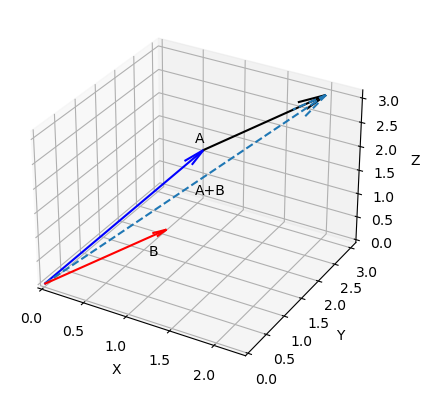

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')    # create 3D figure

Ax, Ay, Az = 1, 2, 2                 # components of A vector
Bx, By, Bz = 1, 1, 1                 # components of B vector

# plot arrows for A, B, A+B and head-to-tail arrow from A to B
ax.quiver(0,0,0,Ax,Ay,Az,color='blue',length=1,arrow_length_ratio=.1)
ax.quiver(0,0,0,Bx,By,Bz,color='red',arrow_length_ratio=.1)

ax.quiver(0,0,0,Ax+Bx,Ay+By,Az+Bz,linestyle='--',arrow_length_ratio=.1)
ax.quiver(Ax,Ay,Az,Bx,By,Bz,color='black',arrow_length_ratio=.2)

ax.set_xlim(0,2.3);
ax.set_ylim(0,3.1);
ax.set_zlim(0,3.1);
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.text(.9,2,2.1,'A')
ax.text(1.1,.3,1.,'B')
ax.text(.9,2,1.,'A+B')

plt.show()

Example 4.2: Displacements as vectors

In [ ]:
import numpy as np
print('-'*28,'CODE OUTPUT','-'*29,'\n')

r1 = np.array([2,3])
r2 = np.array([4,2])

delta_r = r2 - r1
magnitude = np.linalg.norm(delta_r)
direction = np.arctan(delta_r[1]/delta_r[0]) * 180/np.pi

print('Delta r = ', delta_r)
print('The magnitude of Delta r = ', round(magnitude,3))
print('The direction of Delta r = ', round(direction,3), 'degrees')

---------------------------- CODE OUTPUT ----------------------------- 

Delta r =  [ 2 -1]
The magnitude of Delta r =  2.236
The direction of Delta r =  -26.565 degrees


Example 4.3: Work done by a force

In [ ]:
from sympy.vector import CoordSys3D
from sympy import acos, pi
print('-'*28,'CODE OUTPUT','-'*29,'\n')

R = CoordSys3D('R')

F = -3 * R.i +  2 * R.j - 1 * R.k
r =  1 * R.i + -3 * R.j - 2 * R.k

F_mag = F.magnitude()
r_mag = r.magnitude()

work = F.dot(r)
cos_angle = work/(F_mag*r_mag)

print('The work = ', work,' Nm (or J)')
print('The cos(phi) = ', cos_angle)
print('phi = ', (acos(cos_angle) * 180/pi).evalf(5),' degrees')

---------------------------- CODE OUTPUT ----------------------------- 

The work =  -7  Nm (or J)
The cos(phi) =  -1/2
phi =  120.00  degrees


Example 4.4: The dot product of two vectors  in SymPy

In [ ]:
from sympy.vector import CoordSys3D
from sympy import symbols
print('-'*28,'CODE OUTPUT','-'*29,'\n')

Ax, Ay, Az, Bx, By, Bz = symbols('Ax, Ay, Az, Bx, By, Bz')

R = CoordSys3D('R')

A = Ax * R.i +  Ay * R.j + Az * R.k
B = Bx * R.i +  By * R.j + Bz * R.k

print('The dot product method in SymPy is A.dot(B) = ', A.dot(B))
print('The magnitude of A is A.magnitude() = ', A.magnitude())

print('\nThe identity  A.A = Ax^2+Ay^2+Az^2 is ',\
A.dot(A)==A.magnitude()**2)
print('The identity  A.B = B.A   is  ',A.dot(B)==B.dot(A))

print('\nThe dot product of R.i and R.j is ', (R.i).dot(R.j))
print('The dot product of R.i and R.i is ', (R.i).dot(R.i))

---------------------------- CODE OUTPUT ----------------------------- 

The dot product method in SymPy is A.dot(B) =  Ax*Bx + Ay*By + Az*Bz
The magnitude of A is A.magnitude() =  sqrt(Ax**2 + Ay**2 + Az**2)

The identity  A.A = Ax^2+Ay^2+Az^2 is  True
The identity  A.B = B.A   is   True

The dot product of R.i and R.j is  0
The dot product of R.i and R.i is  1


Example 4.5: The dot product in NumPy

In [ ]:
from numpy import dot, array
from sympy import  expand, symbols
print('-'*28,'CODE OUTPUT','-'*29,'\n')

# define general symbols for vector components in SymPy
Ax, Ay, Az, Bx, By, Bz, Cx, Cy, Cz = symbols('Ax, Ay, Az, Bx, By, Bz,\
Cx, Cy, Cz')

A = array([Ax,Ay,Az])   # vector A defined as NumPy array
B = array([Bx,By,Bz])
C = array([Cx,Cy,Cz])

print("The dot product A.B in NumPy is\n dot(A,B) = ", dot(A,B))

print('\nThe dot product A.A=',dot(A,A))

print('\nThe identity A.B=B.A is ',dot(A,B)==dot(B,A))

print('\nThe identity A.(B+C)=A.B+A.C is ',\
dot(A,B+C).expand()==dot(A,B)+dot(A,C))


---------------------------- CODE OUTPUT ----------------------------- 

The dot product A.B in NumPy is
 dot(A,B) =  Ax*Bx + Ay*By + Az*Bz

The dot product A.A= Ax**2 + Ay**2 + Az**2

The identity A.B=B.A is  True

The identity A.(B+C)=A.B+A.C is  True


Example 4.6: Torque

In [ ]:
from sympy.vector import CoordSys3D
print('-'*28,'CODE OUTPUT','-'*29,'\n')

N = CoordSys3D('N')

F = -3 * N.i +  2 * N.j - 1 * N.k   # force vector
r =  1 * N.i + -3 * N.j - 2 * N.k   # position vector

B = -1 * N.i +  1 * N.j - 1 * N.k   # given direction vector B

torque = r.cross(F)
print('The torque = ', torque,' Nm')

B_hat=B.normalize()              # Find unit vector n in direction of B

print('\nThe normal vector is \n B_hat = ', B_hat)

print('\nTorque component along B is:\n', B_hat.dot(r.cross(F)),' N m')

---------------------------- CODE OUTPUT ----------------------------- 

The torque =  7*N.i + 7*N.j + (-7)*N.k  Nm

The normal vector is 
 B_hat =  (-sqrt(3)/3)*N.i + (sqrt(3)/3)*N.j + (-sqrt(3)/3)*N.k

Torque component along B is:
 7*sqrt(3)/3  N m


Example 4.7: Plotting the cross product $\mathbf{A}\times\mathbf{B}$

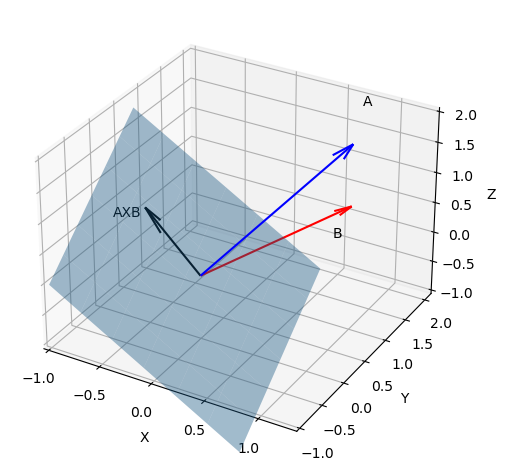

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')   # set up 3D plot

# components of vectors A, B
Ax, Ay, Az = 1, 1, 2
Bx, By, Bz = 1, 1, 1

# plot 3 vectors A, B, AXB using quiver()
ax.quiver(0,0,0,Ax,Ay,Az,color='blue',length=1,arrow_length_ratio=.1)
ax.quiver(0,0,0,Bx,By,Bz,color='red',arrow_length_ratio=.1)
ax.quiver(0,0,0,Ay*Bz-Az*By,Bx*Az-Bz*Ax,Ax*By-Ay*Bx,color='k',\
arrow_length_ratio=.3)

ax.set_xlim(-1,1.3);
ax.set_ylim(-1,2.1);
ax.set_zlim(-1,2);

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.text(.7,2,1.9,'A')
ax.text(1.1,.3,1.,'B')
ax.text(-.6,-.5,1.,'AXB')

x = np.arange(-1, 1, 0.3)
X, Y = np.meshgrid(x, x)
Z = -X+Y
ax.plot_surface(X, Y, Z,alpha=0.4)
plt.tight_layout()
plt.show()

Example 4.8: The cross product of two vectors  in SymPy

In [ ]:
from sympy.vector import CoordSys3D
from sympy import acos, pi, symbols
print('-'*28,'CODE OUTPUT','-'*29,'\n')

Ax, Ay, Az, Bx, By, Bz = symbols('Ax, Ay, Az, Bx, By, Bz')

R = CoordSys3D('R')

A = Ax * R.i +  Ay * R.j + Az * R.k
B = Bx * R.i +  By * R.j + Bz * R.k

print('The cross product in SymPy is A.cross(B) is:\n ', A.cross(B))

print('\nThe cross product   A X A=',A.cross(A))
print('The identity   A X B=- B X A   is ',A.cross(B)==-B.cross(A))


print('\nThe cross product in R.i and R.j is ', (R.i).cross(R.j))
print('The cross product in R.i and R.i is ', (R.i).cross(R.i))

---------------------------- CODE OUTPUT ----------------------------- 

The cross product in SymPy is A.cross(B) is:
  (Ay*Bz - Az*By)*R.i + (-Ax*Bz + Az*Bx)*R.j + (Ax*By - Ay*Bx)*R.k

The cross product   A X A= 0
The identity   A X B=- B X A   is  True

The cross product in R.i and R.j is  R.k
The cross product in R.i and R.i is  0


Example 4.9: The cross product in NumPy

In [ ]:
from numpy import cross, array
from sympy import   symbols, simplify
print('-'*28,'CODE OUTPUT','-'*29,'\n')

Ax, Ay, Az, Bx, By, Bz, Cx, Cy, Cz = symbols('Ax, Ay, Az, Bx, By, Bz,\
Cx, Cy, Cz')

A = array([Ax,Ay,Az])
B = array([Bx,By,Bz])
C = array([Cx,Cy,Cz])

print("The cross product AXB in NumPy is\n cross(A,B) = ", cross(A,B))

print('\nThe cross product AXA=',cross(A,A))

print('\nThe identity  AXB = -BXA  is:',\
simplify(cross(A,B))==simplify(-cross(B,A)))

print('\nThe value of the NumPy array AX(B+C)-AXB-AXC is:\n',\
simplify(cross(A,B+C)-cross(A,B)-cross(A,C)))

---------------------------- CODE OUTPUT ----------------------------- 

The cross product AXB in NumPy is
 cross(A,B) =  [Ay*Bz - Az*By -Ax*Bz + Az*Bx Ax*By - Ay*Bx]

The cross product AXA= [0 0 0]

The identity  AXB = -BXA  is: True

The value of the NumPy array AX(B+C)-AXB-AXC is:
 [0, 0, 0]


Example 4.10: Triple scalar product $\mathbf{A}\cdot\left(\mathbf{B}\times\mathbf{C}\right)$

In [ ]:
from numpy import cross, dot, array
from sympy import   symbols, simplify
print('-'*28,'CODE OUTPUT','-'*29,'\n')

Ax, Ay, Az, Bx, By, Bz, Cx, Cy, Cz = symbols('Ax, Ay, Az, Bx, By, Bz,\
Cx, Cy, Cz')

A = array([Ax,Ay,Az])
B = array([Bx,By,Bz])
C = array([Cx,Cy,Cz])

print('\nThe identity A.(B X C)=B.(C X A) is:',\
simplify(dot(A,cross(B,C))).expand()==\
simplify(dot(B,cross(C,A))).expand())

---------------------------- CODE OUTPUT ----------------------------- 


The identity A.(B X C)=B.(C X A) is: True


Example 4.11: Triple product identity (BAC-CAB rule)

In [ ]:
from numpy import cross, dot, array
from sympy import   symbols, simplify
print('-'*28,'CODE OUTPUT','-'*29,'\n')

Ax, Ay, Az, Bx, By, Bz, Cx, Cy, Cz = symbols('Ax, Ay, Az, Bx, By, Bz,\
Cx, Cy, Cz')

A = array([Ax,Ay,Az])
B = array([Bx,By,Bz])
C = array([Cx,Cy,Cz])

print('The difference A X (B X C) - (B.(A.C)-C.(A.B)) is: ',\
simplify(cross(A,cross(B,C)) - B*dot(A,C)+C*dot(A,B)))

---------------------------- CODE OUTPUT ----------------------------- 

The difference A X (B X C) - (B.(A.C)-C.(A.B)) is:  [0, 0, 0]


Example 4.12: Angular momentum

In [ ]:
from sympy.vector import CoordSys3D
print('-'*28,'CODE OUTPUT','-'*29,'\n')

N = CoordSys3D('N')  # define coordinate system N

# vectors r and omega, N.i=unit vector i
r     = 1 * N.i - 3 * N.j - 2 * N.k
omega = 1 * N.i - 1 * N.j + 4 * N.k

m = 5

velocity = omega.cross(r)      # cross product omega X r

print('Angular momentum l= ',m*r.cross(velocity) , 'kg m^2/s')

---------------------------- CODE OUTPUT ----------------------------- 

Angular momentum l=  90*N.i + (-130)*N.j + 240*N.k kg m^2/s


Example 4.13: Unit vectors in polar coordinates

In [ ]:
from sympy import symbols, Eq, diff, sin, cos, simplify, solve
import pprint
print('-'*28,'CODE OUTPUT','-'*29,'\n')

x, y, dx, dy, rho, phi, drho, dphi, i, j, rhat, phihat = \
symbols('x, y, dx, dy, rho, phi, drho, dphi, i, j, rhat,\
phihat',real = True)
#  define all symbols for real variables

# polar unit vectors as functions of i and j vectors
eq1 = Eq(rhat,cos(phi)*i+sin(phi)*j)
eq2 = Eq(phihat,-sin(phi)*i+cos(phi)*j)

# Use solve to find i,j as functions of the r,phi unit vectors
sol = solve((eq1,eq2),(i,j))

print('i-unit vector = ',simplify(sol[i]))
print('j-unit vector = ',simplify(sol[j]))


---------------------------- CODE OUTPUT ----------------------------- 

i-unit vector =  -phihat*sin(phi) + rhat*cos(phi)
j-unit vector =  phihat*cos(phi) + rhat*sin(phi)


Example 4.14: Infinitesimal length $d\mathbf{s}$ in polar coordinates

In [ ]:
from sympy import symbols, Eq, diff, sin, cos, simplify, solve
import pprint
print('-'*28,'CODE OUTPUT','-'*29,'\n')

x, y, z, dx, dy, dz, rho, phi, drho, dphi = \
symbols('x, y, z, dx, dy, dz, rho, phi, drho, dphi',real=True)
#  define all symbols for real variables

# Equations for (x,y,z) as functions of (r,phi,z)
x = rho*cos(phi)
y = rho*sin(phi)
z = z

# find differentials dx, dy using chain rule
dx = diff(x,rho)*drho+diff(x,phi)*dphi+diff(x,z)*dz
dy = diff(y,rho)*drho+diff(y,phi)*dphi+diff(y,z)*dz
dz = diff(z,rho)*drho+diff(z,phi)*dphi+diff(z,z)*dz

# dx**2+dy**2+dy**2 is the length element ds**2
print('The length element ds**2 in polar coordinates = ')
print(simplify(dx**2+dy**2+dz**2))

---------------------------- CODE OUTPUT ----------------------------- 

The length element ds**2 in polar coordinates = 
dphi**2*rho**2 + drho**2 + dz**2


Example 4.15: Unit vectors and length element $d\mathbf{s}$ in spherical coordinates

In [ ]:
from sympy import symbols, Eq, diff, sin, cos, simplify, solve
import pprint
pp = pprint.PrettyPrinter(width=41, compact=True)
print('-'*28,'CODE OUTPUT','-'*29,'\n')

x, y, dx, dy, r, theta, phi, dr, dtheta, dphi, i, j, k, rhat, thetahat,\
phihat = symbols('x, y, dx, dy, r, theta, phi, dr, dtheta, dphi, i, j, k,\
rhat, thetahat, phihat',real=True)
#  define all symbols

# spherical unit vectors as functions of i, j, k vectors
eq1 = Eq(rhat,sin(theta)*cos(phi)*i+sin(theta)*sin(phi)*j+cos(theta)*k)
eq2 = Eq(thetahat,cos(theta)*cos(phi)*i+cos(theta)*sin(phi)*j-\
sin(theta)*k)
eq3 = Eq(phihat,-sin(phi)*i+cos(phi)*j)
# Use solve to find i,j as functions of the r,phi unit vectors
sol = solve((eq1,eq2,eq3),(i,j,k))

print('i-unit vector = ')
pp.pprint(simplify(sol[i]))
print('\nj-unit vector = ')
pp.pprint(simplify(sol[j]))
print('\nk-unit vector = ')
pp.pprint(simplify(sol[k]))

# Part b: equations for (x,y) as functions of (r,phi)
x = r*sin(theta)*cos(phi)
y = r*sin(theta)*sin(phi)
z = r*cos(theta)

# find differentials dx, dy using chain rule
dx=diff(x,r)*dr+diff(x,phi)*dphi+diff(x,theta)*dtheta
dy=diff(y,r)*dr+diff(y,phi)*dphi+diff(y,theta)*dtheta
dz=diff(z,r)*dr+diff(z,phi)*dphi+diff(z,theta)*dtheta

# dx**2+dy**2 is the length element ds**2
print('\nThe length element ds**2 in spherical coordinates = ')
print(simplify(dx**2+dy**2+dz**2))

---------------------------- CODE OUTPUT ----------------------------- 

i-unit vector = 
-phihat*sin(phi) + rhat*sin(theta)*cos(phi) + thetahat*cos(phi)*cos(theta)

j-unit vector = 
phihat*cos(phi) + rhat*sin(phi)*sin(theta) + thetahat*sin(phi)*cos(theta)

k-unit vector = 
rhat*cos(theta) - thetahat*sin(theta)

The length element ds**2 in spherical coordinates = 
dphi**2*r**2*sin(theta)**2 + dr**2 + dtheta**2*r**2


Example 4.16: Time derivatives of vectors

In [ ]:
from sympy import symbols, diff, simplify
from sympy.vector import CoordSys3D
print('-'*28,'CODE OUTPUT','-'*29,'\n')

R = CoordSys3D('R') #establish a Cartesian coordinate system

c1, c2, c3, t = symbols('c1, c2, c3, t', positive=True)

r = (3*c1*t**2)*R.i - (2*c2*t**3)*R.j + (4*c3*t)*R.k
v = diff(r,t)
a = diff(r,t,t)

print('The instantaneous velocity is: ' + str(v))
print('The instantaneous acceleration is: ' + str(a))

print('The unit vector tangent to the position vetcor at t=0 is:\n',
simplify(v.normalize().subs(t,0)))

---------------------------- CODE OUTPUT ----------------------------- 

The instantaneous velocity is: 6*c1*t*R.i + (-6*c2*t**2)*R.j + 4*c3*R.k
The instantaneous acceleration is: 6*c1*R.i + (-12*c2*t)*R.j
The unit vector tangent to the position vetcor at t=0 is:
 R.k


Example 4.17: Plotting a parametric curve $(x(t),y(t),z(t))$ and tangent vectors

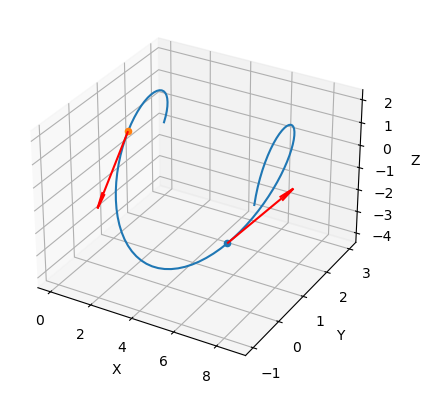

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0, 8.8, 0.1)       # time values from t=0 to t=9 s

def pos(t):
    x = t
    y = 1+2*np.cos(t)           # define x(t), y(t), z(t)
    z = -1+3*np.sin(t)
    return np.array([x,y,z])

def vel(t):
    vx = 1                      # define x(t), y(t), z(t)
    vy = -2*np.sin(t)
    vz = 3*np.cos(t)
    return np.array([vx,vy,vz])

xpos,ypos,zpos=pos(t)           # evaluate the position array

to = 5                             # dot added to graph at to=5 s
xo,yo,zo = pos(to)                 # unpack the position array at t=6 s
velx, vely, velz = vel(to)       # unpack the velocity array at t=6 s

# set up 3D plot and plot curve x(t),y(t),z(t)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot3D(xpos,ypos,zpos)

ax.quiver(xo,yo,zo, velx, vely, velz, color='red',length=1,\
arrow_length_ratio=.2)

ax.scatter(xo,yo,zo)

to = 2                             # dot added to graph at to=2  s
xo,yo,zo = pos(to)                 # unpack the position array at t=2 s
velx, vely, velz = vel(to)       # unpack the velocity array at t=2 s
ax.quiver(xo,yo,zo, velx, vely, velz, color='red',length=1,\
arrow_length_ratio=.2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(xo,yo,zo)

ticks=np.arange(-1,4,1)
ax.set_yticks(ticks)
plt.show()

Example 4.18: Plotting a plane surface and a vector perpendicular to it

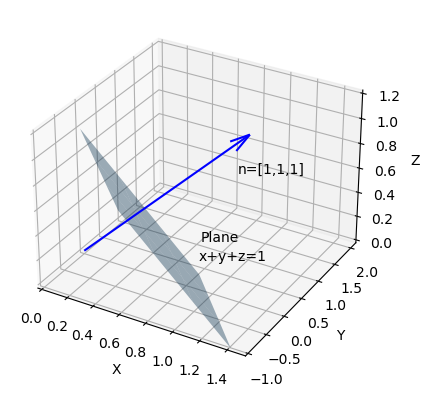

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')       # setup 3D plot

Ax, Ay, Az = 1, 1, 1                # components of vector A

# set up X, Y, Z for surface plot
# use quiver() to plot the arrow, set limits, add text

x = np.arange(0, 1, 0.3)
y = np.arange(0, 1, 0.3)
X, Y = np.meshgrid(x, y)
Z = 1-X-Y
ax.plot_surface(X, Y, Z,alpha=0.4)

ax.quiver(0,0,0,Ax,Ay,Az,color='blue',length=1,arrow_length_ratio=.1)

ax.set_xlim(0,1.5);
ax.set_ylim(-1,2.1);
ax.set_zlim(0,1.2);

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.text(1.1,.3,.9,'n=[1,1,1]')
ax.text(.7,.75,.1,'Plane')
ax.text(.7,.7,-.05,'x+y+z=1')

plt.show()

Example 4.19: Geodesic on a sphere

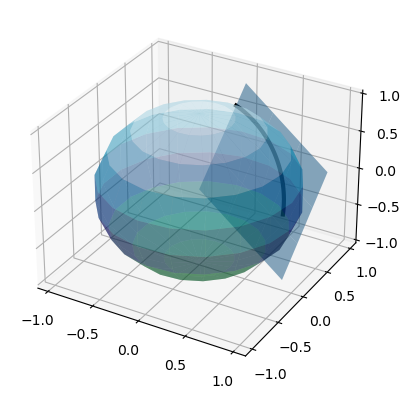

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

fig=plt.figure()
ax=fig.add_subplot(projection='3d')


x = np.arange(0,1,0.3)                       #create the plane
y = np.arange(0,1,0.3)
xp, yp = np.meshgrid(x,y)
zp = yp - xp
ax.plot_surface(xp, yp, zp, alpha = 0.5)


u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]  # create the sphere
xs = np.cos(u)*np.sin(v)
ys = np.sin(u)*np.sin(v)
zs = np.cos(v)
ax.plot_surface(xs, ys, zs, cmap=cm.ocean, alpha = 0.4)

xg = np.linspace(0,0.7,100)                  # create geodesic
yg = (xg + np.sqrt(xg**2 - 8*(2*xg**2-1)))/4
zg = yg - xg
ax.plot3D(xg,yg,zg, 'black', lw = 3)

ticks = np.arange(-1,1.5,0.5)                # graph formatting
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
plt.show()